In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"


In [4]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"
graph set window fontface "Cambria"
set scheme s2color
set more off





not available in non-GUI version




In [5]:
**************************************************************************
***FigureA2. Test statistics of Table 3 varying standard error adjustments
**************************************************************************
**************************************************************************
*** Run regressions and obtain corrected standard errors
*** Results saved to save time
*** Could uncomment if need rerunning
**************************************************************************
local c=1
forvalues c=1/5 {
    if `c'==1 local fes i.OBJECTID i.year
    if `c'==2 local fes i.OBJECTID i.year c.ashprerebels#i.year
    if `c'==3 local fes i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year
    if `c'==4 local fes i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year
	if `c'==5 local fes i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year
    local ctrl
    if `c'==5 local ctrl $ctrls 
    mat tests`c'=(0,0,.)
    * Conley standard errors with varying distance and lag cutoffs 
    preserve
        hdfe $Y $X `ctrl', clear absorb(`fes') tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
        foreach d of numlist 50 100 200 500 1000 2000 {
            foreach t of numlist 20 100 200 262 {            
                disp "Estimating model `c' with distancecutoff `d' and lagcutoff `t' ..."
                ols_spatial_HAC $Y $X `ctrl', lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(`d') lagcutoff(`t')
                ereturn display
                mat ests=r(table)
                scalar d=`d'
                scalar t=`t'
                mat tests`c'=(tests`c'\d,t,ests[3,1])            
            }
        }
    restore
    * Cluster by county
    reghdfe $Y $X `ctrl', absorb(`fes') cluster(OBJECTID)
    ereturn display
    mat ests=r(table)
    scalar d=-1
    scalar t=-1
    mat tests`c'=(tests`c'\d,t,ests[3,1])
    * Cluster by prefecture
    reghdfe $Y $X `ctrl', absorb(`fes') cluster(prefid)
    ereturn display
    mat ests=r(table)
    scalar d=-2
    scalar t=-2
    mat tests`c'=(tests`c'\d,t,ests[3,1])
    * Save statistics
    preserve
        clear
        svmat tests`c', names(stat)
        rename (stat1 stat2 stat3) (dist lag tvalue)
        save "Data/Interim/errors_tests`c'.dta", replace
    restore
}




(cachevars: year OBJECTID)
(converged in 3 iterations)
Estimating model 1 with distancecutoff 50 and lagcutoff 20 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 50 KM
SERIAL CORRELATION KERNAL CUTOFF: 20 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0132483     2.87   0.004     .0120479    .0639807
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+-----------------------

             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 100 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0163857     2.32   0.020     .0058986      .07013
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0163857     2.32   0.020     .0058986      .07013
--------------------------------------------------------------------

SERIAL CORRELATION KERNAL CUTOFF: 200 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0158808     2.39   0.017     .0068882    .0691404
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0158808     2.39   0.017     .0068882    .0691404
------------------------------------------------------------------------------
Estimating model 1 with distancecutoff 500 and lagcutoff 262 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECI

-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0141145     2.69   0.007     .0103501    .0656785
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0141145     2.69   0.007     .0103501    .0656785
------------------------------------------------------------------------------
Estimating model 1 with distancecutoff 2000 and lagcutoff 200 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 2000 KM
SERIAL CORRELATION KERNAL CUTOFF: 200 PERIODS
---------

interaction1 |   .0368671   .0132827     2.78   0.006     .0108333    .0629009
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0132827     2.78   0.006     .0108333    .0629009
------------------------------------------------------------------------------
Estimating model 2 with distancecutoff 50 and lagcutoff 100 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 50 KM
SERIAL CORRELATION KERNAL CUTOFF: 100 PERIODS
------------------------------------------------------------------------------
ashonse~1600 

ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0167985     2.19   0.028     .0039423    .0697918
------------------------------------------------------------------------------
Estimating model 2 with distancecutoff 200 and lagcutoff 20 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 200 KM
SERIAL CORRELATION KERNAL CUTOFF: 20 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0140143     2.63   0.009     .0093993    .0643348
-------------

------------------------------------------------------------------------------
Estimating model 2 with distancecutoff 500 and lagcutoff 262 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0166839     2.21   0.027     .0041669    .0695672
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-----------

 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 2000 KM
SERIAL CORRELATION KERNAL CUTOFF: 200 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0155143     2.38   0.017     .0064593    .0672748
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0155143     2.38   0.017     .0064593    .0672748
-------------

interaction1 |   .0453479   .0136188     3.33   0.001     .0186553    .0720405
------------------------------------------------------------------------------
Estimating model 3 with distancecutoff 50 and lagcutoff 100 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 50 KM
SERIAL CORRELATION KERNAL CUTOFF: 100 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479    .014321     3.17   0.002      .017279    .0734169
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 200 KM
SERIAL CORRELATION KERNAL CUTOFF: 20 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0139947     3.24   0.001     .0179186    .0727773
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0139947     3.24   0.001     .0179186    .072777

 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0167031     2.71   0.007     .0126102    .0780857
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0167031     2.71   0.007     .0126102    .0780857
------------------------------------------------------------------------------
Estimating model 3 with distancecutoff 1000 and lagcutoff 20 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPA

ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0156481     2.90   0.004     .0146779    .0760179
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0156481     2.90   0.004     .0146779    .0760179
------------------------------------------------------------------------------
Estimating model 3 with distancecutoff 2000 and lagcutoff 262 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 50 KM
SERIAL CORRELATION KERNAL CUTOFF: 100 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0147531     2.91   0.004     .0140262    .0718579
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0147531     2.91   0.004     .0140262    .071857

 
SPATIAL CORRELATION KERNAL CUTOFF: 200 KM
SERIAL CORRELATION KERNAL CUTOFF: 20 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0151045     2.84   0.004     .0133375    .0725467
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0151045     2.84   0.004     .0133375    .0725467
------------------------------------------------------------------------------
Estimating model 4 with distancecutoff 200 and lagcutoff 100 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPAT

ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0168245     2.55   0.011     .0099665    .0759177
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0168245     2.55   0.011     .0099665    .0759177
------------------------------------------------------------------------------
Estimating model 4 with distancecutoff 1000 and lagcutoff 20 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION 

interaction1 |   .0429421    .015949     2.69   0.007     .0116824    .0742018
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421    .015949     2.69   0.007     .0116824    .0742018
------------------------------------------------------------------------------
Estimating model 4 with distancecutoff 2000 and lagcutoff 262 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 2000 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1

      drought |   .0060223   .0036268     1.66   0.097    -.0010861    .0131308
flooding_af~r |  -.0064253   .0188857    -0.34   0.734     -.043441    .0305904
drought_after |  -.0014625   .0147774    -0.10   0.921    -.0304259    .0275009
lpopdencnty~r |   -.019603   .0048449    -4.05   0.000     -.029099   -.0101071
        maize |  -.0078846   .0042511    -1.85   0.064    -.0162168    .0004475
  maize_after |   .0239165    .016432     1.46   0.146      -.00829    .0561229
  sweetpotato |  -.0054567   .0056871    -0.96   0.337    -.0166033      .00569
sweetpotato~r |   -.003372   .0112123    -0.30   0.764     -.025348    .0186039
  wheat_after |   .0268149   .0099658     2.69   0.007      .007282    .0463477
   rice_after |   .0124156     .01178     1.05   0.292     -.010673    .0355041
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
ashonset~1600 | Coefficient  Std. err.  

   rice_after |   .0124156   .0127299     0.98   0.329    -.0125347    .0373658
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
ashonset~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
 interaction1 |   .0342417   .0152916     2.24   0.025     .0042705    .0642129
  larea_after |   .0353106   .0066799     5.29   0.000     .0222181    .0484032
    rug_after |  -.0002409   .0000455    -5.30   0.000    -.0003301   -.0001517
     disaster |   -.004098    .003899    -1.05   0.293    -.0117399     .003544
disaster_af~r |  -.0174526    .012307    -1.42   0.156    -.0415741    .0066689
     flooding |   .0020369   .0043755     0.47   0.642     -.006539    .0106127
      drought |   .0060223   .0035601     1.69   0.091    -.0009554        .013
flooding_af~r |  -.0064253   .0199653   

disaster_af~r |  -.0174526   .0127243    -1.37   0.170     -.042392    .0074867
     flooding |   .0020369   .0040879     0.50   0.618    -.0059753    .0100491
      drought |   .0060223    .003516     1.71   0.087     -.000869    .0129136
flooding_af~r |  -.0064253   .0210405    -0.31   0.760    -.0476642    .0348136
drought_after |  -.0014625   .0151898    -0.10   0.923    -.0312342    .0283091
lpopdencnty~r |   -.019603   .0050568    -3.88   0.000    -.0295143   -.0096918
        maize |  -.0078846   .0044695    -1.76   0.078    -.0166447    .0008754
  maize_after |   .0239165   .0177872     1.34   0.179    -.0109461     .058779
  sweetpotato |  -.0054567   .0058378    -0.93   0.350    -.0168987    .0059853
sweetpotato~r |   -.003372   .0112787    -0.30   0.765    -.0254781     .018734
  wheat_after |   .0268149   .0100391     2.67   0.008     .0071384    .0464913
   rice_after |   .0124156   .0135947     0.91   0.361    -.0142298     .039061
----------------------------------------

sweetpotato~r |   -.003372    .012021    -0.28   0.779    -.0269329    .0201888
  wheat_after |   .0268149   .0100173     2.68   0.007      .007181    .0464487
   rice_after |   .0124156   .0144256     0.86   0.389    -.0158583    .0406895
-------------------------------------------------------------------------------
Estimating model 5 with distancecutoff 100 and lagcutoff 262 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1 larea_after rug_after disaster disaster_aft
> er flooding drought flooding_after drought_after lpopdencnty1600_after maize m
> aize_after sweetpotato sweetpotato_after wheat_after rice_after
 
SPATIAL CORRELATION KERNAL CUTOFF: 100 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
-------------------------------------------------------------------------------
ashonset~1600 | Coefficient  Std. err.      t    P>|

> aize_after sweetpotato sweetpotato_after wheat_after rice_after
 
SPATIAL CORRELATION KERNAL CUTOFF: 200 KM
SERIAL CORRELATION KERNAL CUTOFF: 100 PERIODS
-------------------------------------------------------------------------------
ashonset~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
 interaction1 |   .0342417   .0146786     2.33   0.020      .005472    .0630115
  larea_after |   .0353106   .0063932     5.52   0.000     .0227801    .0478412
    rug_after |  -.0002409    .000048    -5.02   0.000     -.000335   -.0001468
     disaster |   -.004098   .0044252    -0.93   0.354    -.0127713    .0045753
disaster_af~r |  -.0174526    .013504    -1.29   0.196    -.0439202     .009015
     flooding |   .0020369   .0038673     0.53   0.598     -.005543    .0096167
      drought |   .0060223   .0033811     1.78   0.075    -.0006046    .0126492
flooding_af~r |  -.0064253   .0207139    -0.

disaster_af~r |  -.0174526   .0137321    -1.27   0.204    -.0443672     .009462
     flooding |   .0020369   .0038218     0.53   0.594    -.0054537    .0095275
      drought |   .0060223   .0033716     1.79   0.074     -.000586    .0126306
flooding_af~r |  -.0064253   .0210032    -0.31   0.760    -.0475911    .0347405
drought_after |  -.0014625   .0162054    -0.09   0.928    -.0332248    .0302998
lpopdencnty~r |   -.019603   .0053023    -3.70   0.000    -.0299955   -.0092106
        maize |  -.0078846   .0047226    -1.67   0.095    -.0171408    .0013715
  maize_after |   .0239165   .0185843     1.29   0.198    -.0125084    .0603413
  sweetpotato |  -.0054567   .0056218    -0.97   0.332    -.0164753    .0055619
sweetpotato~r |   -.003372   .0114961    -0.29   0.769    -.0259042    .0191601
  wheat_after |   .0268149   .0099613     2.69   0.007     .0072908    .0463389
   rice_after |   .0124156   .0140062     0.89   0.375    -.0150363    .0398674
----------------------------------------

sweetpotato~r |   -.003372   .0106951    -0.32   0.753    -.0243342    .0175901
  wheat_after |   .0268149   .0097033     2.76   0.006     .0077966    .0458331
   rice_after |   .0124156   .0123383     1.01   0.314    -.0117673    .0365984
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
ashonset~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
 interaction1 |   .0342417   .0151415     2.26   0.024     .0045647    .0639187
  larea_after |   .0353106   .0066623     5.30   0.000     .0222526    .0483687
    rug_after |  -.0002409   .0000536    -4.50   0.000    -.0003459   -.0001359
     disaster |   -.004098   .0045342    -0.90   0.366    -.0129848    .0047889
disaster_af~r |  -.0174526   .0142996    -1.22   0.222    -.0454795    .0105743
     flooding |   .0020369    .004165   

    rug_after |  -.0002409   .0000553    -4.35   0.000    -.0003494   -.0001324
     disaster |   -.004098   .0046514    -0.88   0.378    -.0132147    .0050188
disaster_af~r |  -.0174526   .0145152    -1.20   0.229    -.0459021    .0109969
     flooding |   .0020369   .0041228     0.49   0.621    -.0060437    .0101174
      drought |   .0060223   .0035896     1.68   0.093    -.0010133    .0130579
flooding_af~r |  -.0064253   .0198996    -0.32   0.747    -.0454281    .0325775
drought_after |  -.0014625   .0172791    -0.08   0.933    -.0353291    .0324041
lpopdencnty~r |   -.019603   .0054581    -3.59   0.000    -.0303007   -.0089053
        maize |  -.0078846   .0047736    -1.65   0.099    -.0172408    .0014715
  maize_after |   .0239165   .0184278     1.30   0.194    -.0122016    .0600346
  sweetpotato |  -.0054567   .0060111    -0.91   0.364    -.0172384     .006325
sweetpotato~r |   -.003372   .0111204    -0.30   0.762    -.0251678    .0184237
  wheat_after |   .0268149   .0102611   

  maize_after |   .0239165   .0174809     1.37   0.171    -.0103458    .0581787
  sweetpotato |  -.0054567   .0063378    -0.86   0.389    -.0178788    .0069654
sweetpotato~r |   -.003372   .0111837    -0.30   0.763    -.0252919    .0185478
  wheat_after |   .0268149   .0097957     2.74   0.006     .0076154    .0460143
   rice_after |   .0124156   .0123976     1.00   0.317    -.0118835    .0367146
-------------------------------------------------------------------------------
Estimating model 5 with distancecutoff 1000 and lagcutoff 200 ...
 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1 larea_after rug_after disaster disaster_aft
> er flooding drought flooding_after drought_after lpopdencnty1600_after maize m
> aize_after sweetpotato sweetpotato_after wheat_after rice_after
 
SPATIAL CORRELATION KERNAL CUTOFF: 1000 KM
SERIAL CORRELATI

INDEPENDANT VARIABLES:  interaction1 larea_after rug_after disaster disaster_aft
> er flooding drought flooding_after drought_after lpopdencnty1600_after maize m
> aize_after sweetpotato sweetpotato_after wheat_after rice_after
 
SPATIAL CORRELATION KERNAL CUTOFF: 2000 KM
SERIAL CORRELATION KERNAL CUTOFF: 20 PERIODS
-------------------------------------------------------------------------------
ashonset~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
 interaction1 |   .0342417   .0149399     2.29   0.022     .0049597    .0635237
  larea_after |   .0353106   .0069896     5.05   0.000     .0216112    .0490101
    rug_after |  -.0002409   .0000559    -4.31   0.000    -.0003505   -.0001313
     disaster |   -.004098   .0047552    -0.86   0.389     -.013418    .0052221
disaster_af~r |  -.0174526   .0134949    -1.29   0.196    -.0439024    .0089972
     flooding |   .0020369   .0042031     

    rug_after |  -.0002409   .0000551    -4.37   0.000     -.000349   -.0001328
     disaster |   -.004098   .0047966    -0.85   0.393    -.0134991    .0053032
disaster_af~r |  -.0174526    .013876    -1.26   0.208    -.0446493     .009744
     flooding |   .0020369   .0041184     0.49   0.621    -.0060351    .0101089
      drought |   .0060223   .0035703     1.69   0.092    -.0009754      .01302
flooding_af~r |  -.0064253   .0208069    -0.31   0.757    -.0472063    .0343557
drought_after |  -.0014625   .0164296    -0.09   0.929    -.0336642    .0307392
lpopdencnty~r |   -.019603   .0062961    -3.11   0.002    -.0319432   -.0072628
        maize |  -.0078846   .0047415    -1.66   0.096    -.0171778    .0014085
  maize_after |   .0239165   .0177596     1.35   0.178     -.010892    .0587249
  sweetpotato |  -.0054567   .0063393    -0.86   0.389    -.0178817    .0069683
sweetpotato~r |   -.003372   .0118056    -0.29   0.775    -.0265108    .0197667
  wheat_after |   .0268149    .010246   

lpopdencnty~r |  -.0195797   .0044988    -4.35   0.000    -.0284171   -.0107423
        maize |  -.0078825   .0040151    -1.96   0.050    -.0157698    4.78e-06
  maize_after |   .0239267    .015651     1.53   0.127    -.0068182    .0546716
  sweetpotato |  -.0054499   .0048869    -1.12   0.265    -.0150498    .0041501
sweetpotato~r |  -.0033825    .010557    -0.32   0.749    -.0241208    .0173559
  wheat_after |   .0268425   .0105067     2.55   0.011      .006203    .0474819
   rice_after |   .0124387   .0140688     0.88   0.377    -.0151983    .0400757
        _cons |  -.0267575   .0195447    -1.37   0.172    -.0651513    .0116363
-------------------------------------------------------------------------------

Absorbed degrees of freedom:
-------------------------------------------------------------+
         Absorbed FE | Categories  - Redundant  = Num. Coefs |
---------------------+---------------------------------------|
            OBJECTID |       536         536           0    *

Number of observations (_N) was 0, now 27.
(file Data/Interim/errors_tests5.dta not found)
file Data/Interim/errors_tests5.dta saved


In [ ]:
**************************************************************************
*** Visualize the test statistics across different parameter choices
**************************************************************************
local c=1
forvalues c=1/5 {
    use "Data/Interim/errors_tests`c'.dta", clear
    drop in 1
    recode dist (-1 -2=1 "NA") (50=2 "50") (100=4 "100") (200=6 "200") (500=8 "500") (1000=10 "1000") (2000=12 "2000"),gen(distcat) label(distcat)
    gen mlabel="cluster(county)" if dist==-1
    replace mlabel="cluster(prefecture)" if dist==-2
    #d ;
	twoway 
	(connected tvalue distcat if dist>0 & lag==20, msymbol(Oh) color(black)) 
	(connected tvalue distcat if dist>0 & lag==100, msymbol(T) color(black)) 
	(connected tvalue distcat if dist>0 & lag==200, msymbol(O) color(black)) 
	(connected tvalue distcat if dist>0 & lag==262, msymbol(X) color(black)) 
	(scatter tvalue distcat if inlist(dist,-1,-2),mlabel(mlabel) mlabcolor(black) msize(*0.5) color(black))
	,
	ytitle("Test t-value", size(*0.9)) 
	xtitle("Distance cutoff (km)", size(*0.9) margin(medsmall))
	yline(1.75(0.25)3.25, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
	xline(1(1)12, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
	yline(1.96, lpattern(dash) lcolor("128 0 0"))
	yline(2.58, lpattern(dash) lcolor("128 0 0"))
	text(1.94 0.6 "**" 2.56 0.55 "***", color("128 0 0"))
	ylabel(1.8 " " 2 "2.0" 2.5 "2.5" 3 "3.0", angle(0) format(%5.1f) labsize(*0.85) notick)
	xlabel(1 2(2)12,valuelabel labsize(*0.85)) 
	graphregion(fcolor(gs16) lcolor(gs16)) 
	plotregion(lcolor("white") lwidth(*0.9))
	legend(order(1 "lagcutoff:20 years" 2 "lagcutoff:100 years" 3 "lagcutoff:200 years" 4 "lagcutoff:all (262) years") row(1) size(*0.45))
	title("", size(small) margin(small))
	;
	#d cr
    graph export "Results/Figures/figureA2_col`c'_t.pdf", replace
}




(1 observation deleted)
(26 differences between dist and distcat)
(25 missing values generated)
variable mlabel was str15 now str19
(1 real change made)
file /Users/chengjun/.stata_kernel_cache/graph.svg saved as SVG format
file /Users/chengjun/.stata_kernel_cache/graph.pdf saved as PDF format
file Results/Figures/figureA2_col1_t.pdf saved as PDF format
(1 observation deleted)
(26 differences between dist and distcat)
(25 missing values generated)
variable mlabel was str15 now str19
(1 real change made)


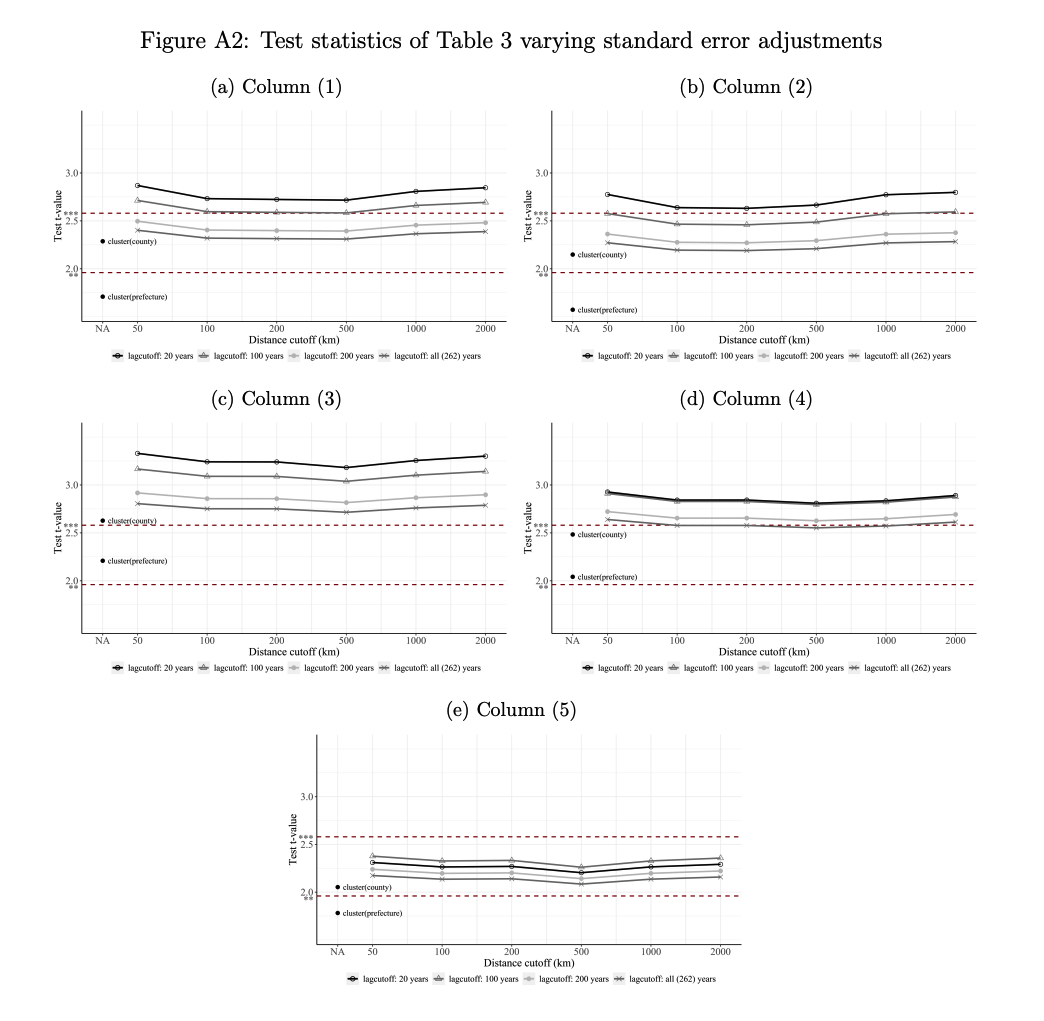

In [ ]:
**************************************************************************
*** Write to Latex
**************************************************************************
local v t
file open f using "Results/Figures/figureA2.tex", write replace
file write f "\begin{figure}[p]\captionsetup{justification=centering,singlelinecheck=false,width=0.8\textwidth}" _n
file write f "\begin{center}" _n
file write f "\caption{Test statistics of Table 3 varying standard error adjustments}" _n
file write f "\subfloat[Column (1)]{ " _n
file write f "\includegraphics[width=.49\textwidth]{Figures/figureA2_col1_`v'.pdf}}\hspace{\fill}%" _n
file write f "\subfloat[Column (2)]{ " _n
file write f "\includegraphics[width=.49\textwidth]{Figures/figureA2_col2_`v'.pdf}}\\" _n
file write f "\subfloat[Column (3)]{ " _n
file write f "\includegraphics[width=.49\textwidth]{Figures/figureA2_col3_`v'.pdf}}\hspace{\fill}%" _n
file write f "\subfloat[Column (4)]{" _n
file write f "\includegraphics[width=.49\textwidth]{Figures/figureA2_col4_`v'.pdf}}\\" _n
file write f "\subfloat[Column (5)]{" _n
file write f "\includegraphics[width=.49\textwidth]{Figures/figureA2_col5_`v'.pdf}}\hspace{\fill}%" _n
file write f "\end{center}" _n
file write f "\footnotesize{\textit{Note.} The figure depicts the test t-values calculated using different methods and parameters for standard errors. }" _n
file write f "The five panels correspond to the five columns in baseline Table3. "
file write f "For each panel, the two isolated dots represent t-values calculated using standard errors clustered at the county level (which is reported in Table3) and the prefecture level, respectively. "
file write f "The connected lines represent the t-values calculated using Conley standard errors with different combinations of distance and time cutoffs. "
file write f "Specifically, the x-axis displays different distance cutoffs (50, 100, 200, 500, 1000, 2000km), whereas the markers' shapes identify different time cutoffs (20, 100, 200, and 262 years). "
file write f "The dashed horizontal lines mark the t-values of conventional levels of significance (* 0.10 ** 0.05 *** 0.01). "
file write f "\end{figure}" _n
file close f

file /Users/chengjun/.stata_kernel_cache/graph1.svg saved as SVG format
file /Users/chengjun/.stata_kernel_cache/graph1.pdf saved as PDF format
file Results/Figures/figureA2_col2_t.pdf saved as PDF format
(1 observation deleted)
(26 differences between dist and distcat)
(25 missing values generated)
variable mlabel was str15 now str19
(1 real change made)
